In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 10

In [2]:
# contient les données de conso par heure et créé par node-red
# chaque entrée est la conso estimée qui est calculée pour 1 heure en kWh suivant la conso instantanée
# la moyenne de l'ensemble donne une idée de la conso théorique qui n'est pas réelle
# car la vrai consommation est le nombre d'entrées qui chacune représente 1 watt réellement consommé.

df = pd.read_csv(r"C:\Users\jeand\Documents\interval&conso.csv", names=["interval","conso_h"])
df

interval  conso_h
0          25216     0.14
1          25208     0.14
2          25282     0.14
3          24283     0.15
4          24577     0.15
...          ...      ...
167148     28759     0.12
167149     28253     0.13
167150     27575     0.13
167151     28193     0.13
167152     27336     0.13

[167153 rows x 2 columns]

In [3]:
df['cumul(ms)']=df['interval'].cumsum()
df

interval  conso_h   cumul(ms)
0          25216     0.14       25216
1          25208     0.14       50424
2          25282     0.14       75706
3          24283     0.15       99989
4          24577     0.15      124566
...          ...      ...         ...
167148     28759     0.12  3672625096
167149     28253     0.13  3672653349
167150     27575     0.13  3672680924
167151     28193     0.13  3672709117
167152     27336     0.13  3672736453

[167153 rows x 3 columns]

In [4]:
w1000 = df.tail(1000)
w1000

interval  conso_h   cumul(ms)
166153     35781     0.10  3642704294
166154     35953     0.10  3642740247
166155     35998     0.10  3642776245
166156     35336     0.10  3642811581
166157     35599     0.10  3642847180
...          ...      ...         ...
167148     28759     0.12  3672625096
167149     28253     0.13  3672653349
167150     27575     0.13  3672680924
167151     28193     0.13  3672709117
167152     27336     0.13  3672736453

[1000 rows x 3 columns]

In [5]:
# fenetre 1 kW consommé
w1000['cumul(ms)']=w1000['interval'].cumsum()
w1000

interval  conso_h  cumul(ms)
166153     35781     0.10      35781
166154     35953     0.10      71734
166155     35998     0.10     107732
166156     35336     0.10     143068
166157     35599     0.10     178667
...          ...      ...        ...
167148     28759     0.12   29956583
167149     28253     0.13   29984836
167150     27575     0.13   30012411
167151     28193     0.13   30040604
167152     27336     0.13   30067940

[1000 rows x 3 columns]

In [6]:
# index fenetre 
w1000.tail().index

RangeIndex(start=167148, stop=167153, step=1)

In [7]:
# index de fin
l1000 = w1000.tail().index.stop
l1000

167153

In [8]:
# valeur temps de conso en ms pour 1 kW
temps_1kw=w1000._get_value(l1000-1,'cumul(ms)')
temps_1kw

np.int64(30067940)

In [9]:
# conversion temps de conso en heures
heures_1kw=temps_1kw/1000/3600
heures_1kw

np.float64(8.352205555555555)

In [10]:
# conso en kw par heure
conso_moyenne_heure = 1/heures_1kw
conso_moyenne_heure

np.float64(0.11972885405518303)

In [11]:
# conso en watt depuis le 7 mars 2024
l=len(df)


In [12]:
df.tail()

interval  conso_h   cumul(ms)
167148     28759     0.12  3672625096
167149     28253     0.13  3672653349
167150     27575     0.13  3672680924
167151     28193     0.13  3672709117
167152     27336     0.13  3672736453

In [13]:
# temps en ms depuis le 7 mars 2024
cumtime= int(df._get_value(l-1,'cumul(ms)'))
# conversion en heure
heures_c = cumtime/1000/3600
heures_c


1020.2045702777779

In [14]:
#  jours depuis le 7 mars 2024
jours_c = heures_c/24
jours_c

42.508523761574075

In [15]:
# en kWh
l_kwh = l/1000
l_kwh

167.153

In [16]:
# conso moyenne par heure en kwh
l_kwh/heures_c

0.16384263006632888

In [17]:

from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2025, 3, 25, 10, 51, 13, 940035)

In [18]:
import datetime as dt
df['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in df['cumul(ms)']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167153 entries, 0 to 167152
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   interval   167153 non-null  int64         
 1   conso_h    167153 non-null  float64       
 2   cumul(ms)  167153 non-null  int64         
 3   dates      167153 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.1 MB


In [19]:
df

interval  conso_h   cumul(ms)                      dates
0          25216     0.14       25216 2025-03-25 10:51:39.156035
1          25208     0.14       50424 2025-03-25 10:52:04.364035
2          25282     0.14       75706 2025-03-25 10:52:29.646035
3          24283     0.15       99989 2025-03-25 10:52:53.929035
4          24577     0.15      124566 2025-03-25 10:53:18.506035
...          ...      ...         ...                        ...
167148     28759     0.12  3672625096 2025-05-06 23:01:39.036035
167149     28253     0.13  3672653349 2025-05-06 23:02:07.289035
167150     27575     0.13  3672680924 2025-05-06 23:02:34.864035
167151     28193     0.13  3672709117 2025-05-06 23:03:03.057035
167152     27336     0.13  3672736453 2025-05-06 23:03:30.393035

[167153 rows x 4 columns]

In [20]:
df.tail()

interval  conso_h   cumul(ms)                      dates
167148     28759     0.12  3672625096 2025-05-06 23:01:39.036035
167149     28253     0.13  3672653349 2025-05-06 23:02:07.289035
167150     27575     0.13  3672680924 2025-05-06 23:02:34.864035
167151     28193     0.13  3672709117 2025-05-06 23:03:03.057035
167152     27336     0.13  3672736453 2025-05-06 23:03:30.393035

In [21]:
l=len(df)
df._get_value(l-1,'dates')

Timestamp('2025-05-06 23:03:30.393035')

In [22]:
total_kwh = len(df)/1000   # chaque entrée est 1 watt consommé, la longueur donne le total de watts consommé
total_kwh

167.153

In [23]:
conso_moyen = df.conso_h.mean()
conso_moyen*1000        # en watt en moyenne sur la période

np.float64(367.6446728446393)

In [24]:
# calcul de la moyenne (cumul / nombre d'entrées)
df['cumul']=df['conso_h'].cumsum(axis=0)

In [25]:
# https://www.statology.org/cumulative-average-python/
df ['cumul_avg']=df['conso_h'].expanding().mean()

In [26]:
df


interval  conso_h   cumul(ms)                      dates     cumul  \
0          25216     0.14       25216 2025-03-25 10:51:39.156035      0.14   
1          25208     0.14       50424 2025-03-25 10:52:04.364035      0.28   
2          25282     0.14       75706 2025-03-25 10:52:29.646035      0.42   
3          24283     0.15       99989 2025-03-25 10:52:53.929035      0.57   
4          24577     0.15      124566 2025-03-25 10:53:18.506035      0.72   
...          ...      ...         ...                        ...       ...   
167148     28759     0.12  3672625096 2025-05-06 23:01:39.036035  61452.39   
167149     28253     0.13  3672653349 2025-05-06 23:02:07.289035  61452.52   
167150     27575     0.13  3672680924 2025-05-06 23:02:34.864035  61452.65   
167151     28193     0.13  3672709117 2025-05-06 23:03:03.057035  61452.78   
167152     27336     0.13  3672736453 2025-05-06 23:03:30.393035  61452.91   

        cumul_avg  
0        0.140000  
1        0.140000  
2        0.140000  
3        0.142500  
4        0.144000  
...           ...  
167148   0.367650  
167149   0.367649  
167150   0.367648  
167151   0.367646  
167152   0.367645  

[167153 rows x 6 columns]

In [27]:
df['conso_h'].sum()

np.float64(61452.90999999999)

In [28]:
df.cumul[390:400]

390    134.28
391    134.42
392    134.56
393    134.70
394    134.84
395    134.98
396    135.12
397    135.26
398    135.40
399    135.54
Name: cumul, dtype: float64

In [29]:
import math 
step = 1
x = []
y = []
ratio = []
for i,k in enumerate(df.cumul):    
    if math.floor(k)>= step:
        print(i,k,step)
        x.append(i)
        y.append(k)
        ratio.append(k/i)
        step+=1

6 1.02 1
13 2.0599999999999996 2
20 3.06 3
27 4.050000000000001 4
34 5.0299999999999985 5
41 6.009999999999996 6
49 7.129999999999994 7
56 8.109999999999992 8
63 9.089999999999996 9
70 10.07 10
77 11.050000000000004 11
84 12.030000000000008 12
90 13.110000000000012 13
95 14.160000000000016 14
99 15.00000000000002 15
105 16.14000000000002 16
108 18.88000000000002 17
109 21.24000000000002 18
110 23.60000000000002 19
111 25.96000000000002 20
112 28.33000000000002 21
113 30.69000000000002 22
114 33.05000000000002 23
115 35.41000000000002 24
116 37.76000000000002 25
117 40.11000000000002 26
118 42.47000000000002 27
119 44.84000000000002 28
120 47.19000000000002 29
121 49.55000000000002 30
122 51.91000000000002 31
123 54.26000000000002 32
124 56.61000000000002 33
125 58.96000000000002 34
126 61.300000000000026 35
127 63.64000000000003 36
128 65.99000000000002 37
129 68.34000000000002 38
130 70.69000000000001 39
131 73.04 40
132 75.4 41
133 77.75 42
134 80.11 43
135 82.46 44
136 84.82 45
137 

In [30]:
for i in range(len(x)):
    print(x[i],y[i],ratio[i])

6 1.02 0.17
13 2.0599999999999996 0.15846153846153843
20 3.06 0.153
27 4.050000000000001 0.15000000000000002
34 5.0299999999999985 0.1479411764705882
41 6.009999999999996 0.14658536585365844
49 7.129999999999994 0.1455102040816325
56 8.109999999999992 0.14482142857142843
63 9.089999999999996 0.14428571428571424
70 10.07 0.14385714285714285
77 11.050000000000004 0.14350649350649355
84 12.030000000000008 0.14321428571428582
90 13.110000000000012 0.1456666666666668
95 14.160000000000016 0.14905263157894755
99 15.00000000000002 0.1515151515151517
105 16.14000000000002 0.1537142857142859
108 18.88000000000002 0.174814814814815
109 21.24000000000002 0.1948623853211011
110 23.60000000000002 0.21454545454545473
111 25.96000000000002 0.23387387387387404
112 28.33000000000002 0.25294642857142874
113 30.69000000000002 0.27159292035398247
114 33.05000000000002 0.28991228070175457
115 35.41000000000002 0.30791304347826104
116 37.76000000000002 0.3255172413793105
117 40.11000000000002 0.342820512820

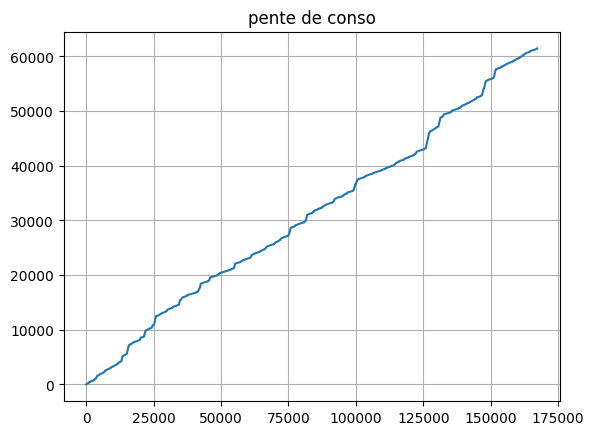

In [31]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('pente de conso')
plt.grid()

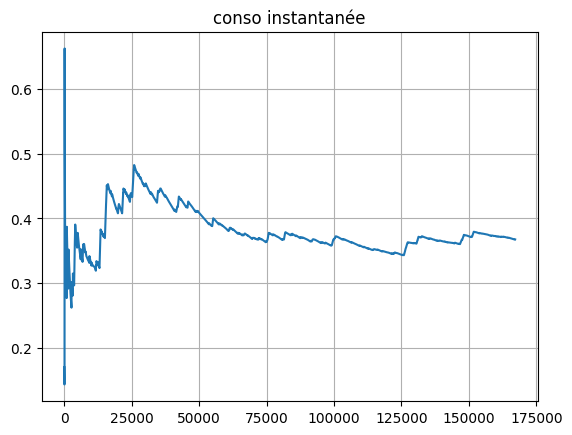

In [32]:
plt.plot(x,ratio)
plt.title('conso instantanée')
plt.grid()

<Axes: >

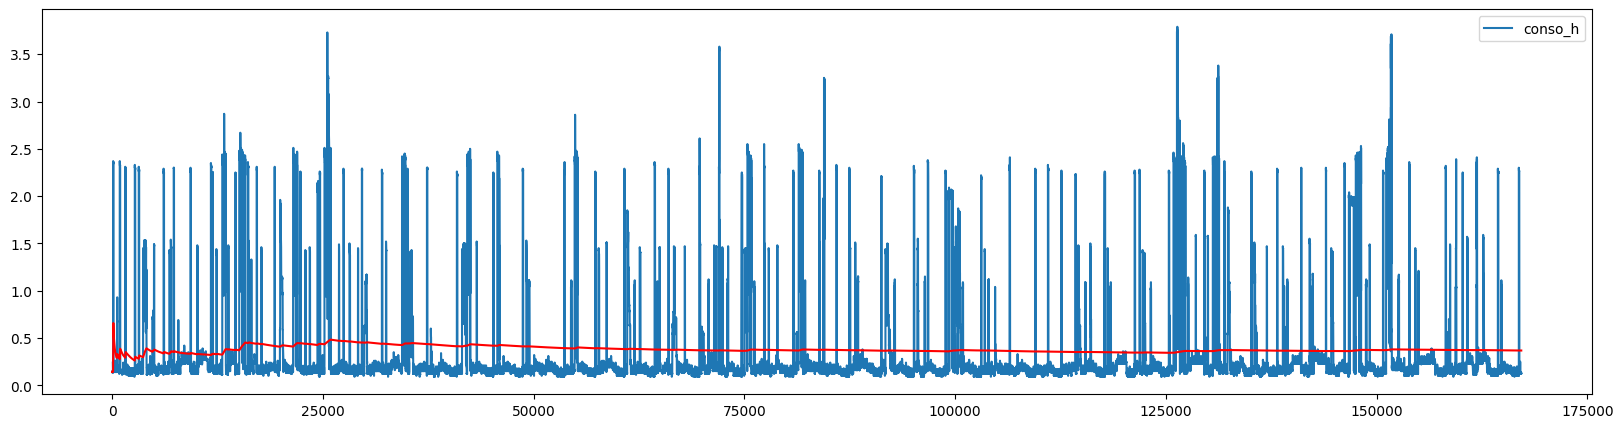

In [33]:
k=1
tail = k*1000
# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.plot.html
#df['conso_h'].tail(tail).plot.bar(figsize=(20,5),legend=True)
#df['conso_h'].plot.bar(figsize=(20,5),legend=True)
df['conso_h'].plot(figsize=(20,5),legend=True)

# https://stackoverflow.com/questions/47104862/pandas-dataframe-plot-colors-by-column-name
df['cumul_avg'].plot(color='#FF0000')  # red
#plt.axis('off')


<Axes: >

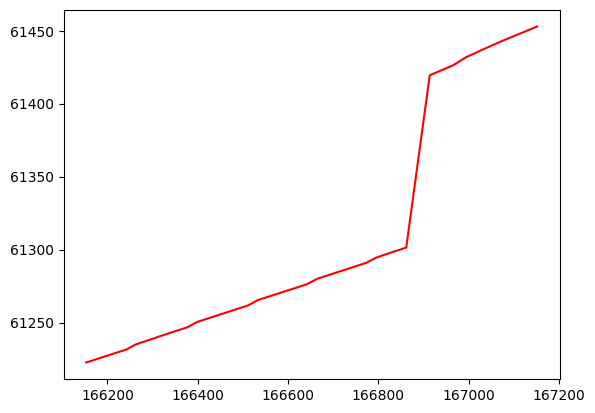

In [34]:
df['cumul'].tail(1000).plot(color='#FF0000')  # red
#plt.axis('off')

In [35]:
df['conso_h'].tail(15)

167138    0.12
167139    0.13
167140    0.13
167141    0.13
167142    0.12
          ... 
167148    0.12
167149    0.13
167150    0.13
167151    0.13
167152    0.13
Name: conso_h, Length: 15, dtype: float64

In [36]:
# 23095 = 2024/03/13 10:30

<Axes: >

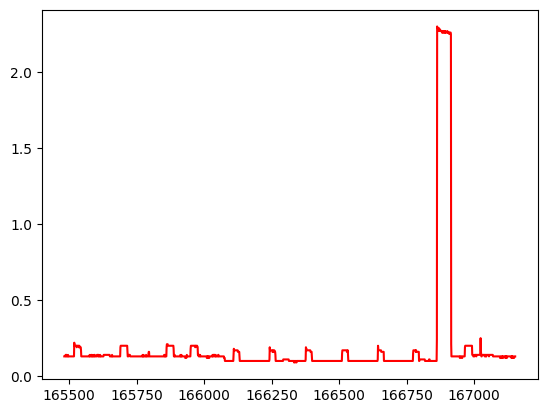

In [37]:
df['conso_h'].tail(l//100).plot(color='#FF0000')  # red
#plt.axis('off')

In [38]:
df.head(),len(df)

(   interval  conso_h  cumul(ms)                      dates  cumul  cumul_avg
 0     25216     0.14      25216 2025-03-25 10:51:39.156035   0.14     0.1400
 1     25208     0.14      50424 2025-03-25 10:52:04.364035   0.28     0.1400
 2     25282     0.14      75706 2025-03-25 10:52:29.646035   0.42     0.1400
 3     24283     0.15      99989 2025-03-25 10:52:53.929035   0.57     0.1425
 4     24577     0.15     124566 2025-03-25 10:53:18.506035   0.72     0.1440,
 167153)

In [39]:
df.tail(15)

interval  conso_h   cumul(ms)                      dates     cumul  \
167138     28670     0.12  3672340621 2025-05-06 22:56:54.561035  61451.14   
167139     27692     0.13  3672368313 2025-05-06 22:57:22.253035  61451.27   
167140     27288     0.13  3672395601 2025-05-06 22:57:49.541035  61451.40   
167141     28022     0.13  3672423623 2025-05-06 22:58:17.563035  61451.53   
167142     28898     0.12  3672452521 2025-05-06 22:58:46.461035  61451.65   
...          ...      ...         ...                        ...       ...   
167148     28759     0.12  3672625096 2025-05-06 23:01:39.036035  61452.39   
167149     28253     0.13  3672653349 2025-05-06 23:02:07.289035  61452.52   
167150     27575     0.13  3672680924 2025-05-06 23:02:34.864035  61452.65   
167151     28193     0.13  3672709117 2025-05-06 23:03:03.057035  61452.78   
167152     27336     0.13  3672736453 2025-05-06 23:03:30.393035  61452.91   

        cumul_avg  
167138   0.367665  
167139   0.367663  
167140   0.367662  
167141   0.367661  
167142   0.367659  
...           ...  
167148   0.367650  
167149   0.367649  
167150   0.367648  
167151   0.367646  
167152   0.367645  

[15 rows x 6 columns]

In [40]:
import datetime as dt
from datetime import datetime
import pytz
def human_date(timestamp):
   return datetime.fromtimestamp(timestamp, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')

In [41]:
presentDate = datetime.now()
unix_timestamp = datetime.timestamp(presentDate)
unix_timestamp, human_date(unix_timestamp)

(1742899955.072779, '25/03/2025 11:52:35')

In [42]:
df['dates'] = [int(unix_timestamp)-d for d in df.index[::-1]]
df['hdates'] = list(map(human_date,df.dates))
df

interval  conso_h   cumul(ms)       dates     cumul  cumul_avg  \
0          25216     0.14       25216  1742732803      0.14   0.140000   
1          25208     0.14       50424  1742732804      0.28   0.140000   
2          25282     0.14       75706  1742732805      0.42   0.140000   
3          24283     0.15       99989  1742732806      0.57   0.142500   
4          24577     0.15      124566  1742732807      0.72   0.144000   
...          ...      ...         ...         ...       ...        ...   
167148     28759     0.12  3672625096  1742899951  61452.39   0.367650   
167149     28253     0.13  3672653349  1742899952  61452.52   0.367649   
167150     27575     0.13  3672680924  1742899953  61452.65   0.367648   
167151     28193     0.13  3672709117  1742899954  61452.78   0.367646   
167152     27336     0.13  3672736453  1742899955  61452.91   0.367645   

                     hdates  
0       23/03/2025 13:26:43  
1       23/03/2025 13:26:44  
2       23/03/2025 13:26:45  
3       23/03/2025 13:26:46  
4       23/03/2025 13:26:47  
...                     ...  
167148  25/03/2025 11:52:31  
167149  25/03/2025 11:52:32  
167150  25/03/2025 11:52:33  
167151  25/03/2025 11:52:34  
167152  25/03/2025 11:52:35  

[167153 rows x 7 columns]

In [43]:
import numpy as np
ticks = np.arange(len(df)-tail,len(df),50)
x_ticks = df.loc[ticks].dates
h_ticks = df.loc[ticks].hdates


In [44]:
df

interval  conso_h   cumul(ms)       dates     cumul  cumul_avg  \
0          25216     0.14       25216  1742732803      0.14   0.140000   
1          25208     0.14       50424  1742732804      0.28   0.140000   
2          25282     0.14       75706  1742732805      0.42   0.140000   
3          24283     0.15       99989  1742732806      0.57   0.142500   
4          24577     0.15      124566  1742732807      0.72   0.144000   
...          ...      ...         ...         ...       ...        ...   
167148     28759     0.12  3672625096  1742899951  61452.39   0.367650   
167149     28253     0.13  3672653349  1742899952  61452.52   0.367649   
167150     27575     0.13  3672680924  1742899953  61452.65   0.367648   
167151     28193     0.13  3672709117  1742899954  61452.78   0.367646   
167152     27336     0.13  3672736453  1742899955  61452.91   0.367645   

                     hdates  
0       23/03/2025 13:26:43  
1       23/03/2025 13:26:44  
2       23/03/2025 13:26:45  
3       23/03/2025 13:26:46  
4       23/03/2025 13:26:47  
...                     ...  
167148  25/03/2025 11:52:31  
167149  25/03/2025 11:52:32  
167150  25/03/2025 11:52:33  
167151  25/03/2025 11:52:34  
167152  25/03/2025 11:52:35  

[167153 rows x 7 columns]

In [45]:
# fig, ax = plt.subplots()
# plt.plot(ticks,df['conso_h'].tail(tail))

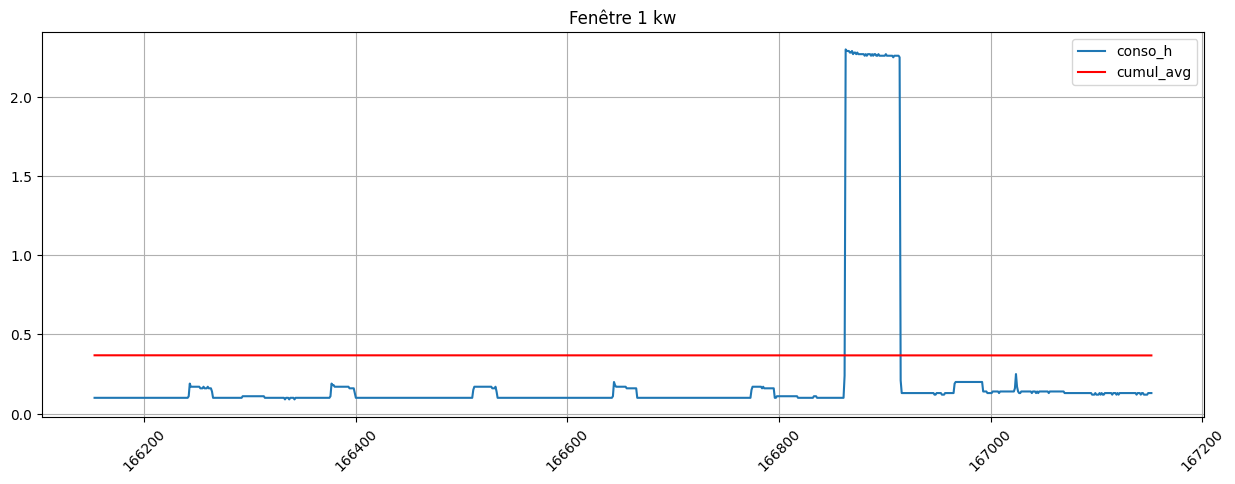

In [46]:
df['conso_h'].tail(tail).plot(figsize=(15,5),legend=True)
df['cumul_avg'].tail(tail).plot(color='red',grid=False, legend=True,rot=45)#,xticks=x_ticks)  # red

plt.title(f'Fenêtre {k} kw')
#plt.xticks(ticks, h_ticks)
plt.grid()

<Axes: ylabel='Frequency'>

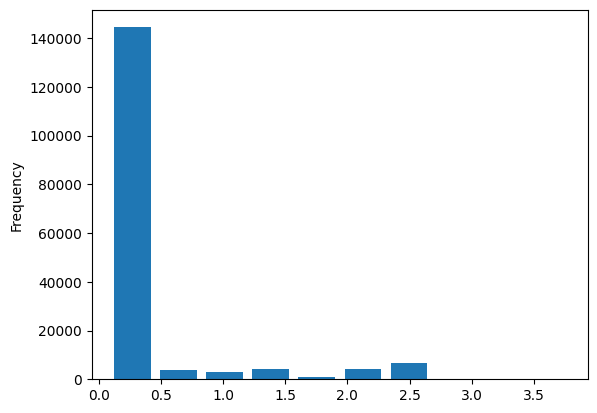

In [47]:
df['conso_h'].plot.hist(rwidth=0.8)